# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Faisal Rabbani Sitompul]
- **Email:** [faisalrabbanisitompul@gmail.com]
- **ID Dicoding:** [owlninj4]

## Menentukan Pertanyaan Bisnis

1. Apa faktor utama yang memengaruhi pola penyewaan sepeda berdasarkan waktu dan kondisi lingkungan?
2. Kapan waktu terbaik untuk meningkatkan ketersediaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

#### Membaca data hour.csv

In [10]:
hour_df = pd.read_csv('data/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


#### Membaca data day.cvs

In [11]:
day_df = pd.read_csv('data/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### Insight dari `day.csv`
1. **Jumlah Pengguna Harian**: `cnt` menunjukkan total pengguna per hari.
2. **Pengguna Berdaftar vs. Tidak Berdaftar**: `registered` dan `casual` membedakan antara pengguna berdaftar dan kasual.
3. **Pengaruh Cuaca**: `weathersit` dapat membantu mengukur pengaruh kondisi cuaca terhadap penggunaan.
4. **Suhu dan Kelembaban**: `temp` dan `hum` dapat digunakan untuk menganalisis dampak lingkungan pada jumlah pengguna.
5. **Hari Kerja vs. Akhir Pekan**: `workingday` menunjukkan perbedaan jumlah pengguna antara hari kerja dan akhir pekan.
6. **Musim**: `season` menunjukkan pengaruh musim terhadap jumlah pengguna.

#### Insight dari `hour.csv`
1. **Jumlah Pengguna per Jam**: `cnt` menunjukkan total pengguna per jam.
2. **Pengguna Berdaftar vs. Tidak Berdaftar**: `registered` dan `casual` mengidentifikasi perbedaan antara pengguna berdaftar dan kasual per jam.
3. **Pengaruh Cuaca**: `weathersit` mempengaruhi jumlah pengguna per jam.
4. **Suhu dan Kelembaban**: `temp` dan `hum` untuk menganalisis dampak suhu dan kelembaban per jam.
5. **Hari Kerja vs. Akhir Pekan**: `workingday` memberikan perbandingan jumlah pengguna antara hari kerja dan akhir pekan per jam.
6. **Jam**: `hr` membantu dalam analisis tren penggunaan berdasarkan jam dalam sehari.

### Assessing Data

#### Assesing data hour.csv

In [12]:
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


#### Assesing data day.csv

In [15]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [16]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [17]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Pengguna terdaftar (registered) secara konsisten lebih banyak daripada pengguna kasual di kedua dataset.
- Variabel seperti suhu, kelembapan, dan kecepatan angin berpotensi memengaruhi pola penggunaan sepeda.
- Penggunaan harian lebih fluktuatif

### Cleaning Data

In [18]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [19]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Kolom dteday bertipe object meskipun menyimpan data tanggal. Idealnya, kolom ini seharusnya dikonversi menjadi tipe datetime.
- Mengahpus kolom 'instant', Kolom ini tampaknya adalah indeks unik untuk setiap baris, yang redundan karena DataFrame sudah memiliki indeks bawaan. 

In [20]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df.drop(columns=['instant'], inplace=True)
day_df.drop(columns=['instant'], inplace=True)

Cek kembali "dteday"

In [21]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   yr          17379 non-null  int64         
 3   mnth        17379 non-null  int64         
 4   hr          17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  int64         
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  hum         17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  cnt         17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [22]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   yr          731 non-null    int64         
 3   mnth        731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  hum         731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(10)
memory usage: 85.8 KB


## Exploratory Data Analysis (EDA)

In [94]:
hour_df.describe(include="all")

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Recency,high_rentals,cluster
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17379,NaN
mean,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,363.827378,NaN,1.012889
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,NaN,0.000000
25%,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,182.000000,NaN,0.000000
50%,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,364.000000,NaN,1.000000
75%,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,546.000000,NaN,2.000000
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,730.000000,NaN,2.000000


In [95]:
day_df.describe(include="all")

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,high_rentals
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,High
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,712
mean,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


In [106]:
# Menghitung korelasi antara jumlah penyewaan sepeda dan fitur numerik lainnya
correlation = hour_df[['cnt', 'hr', 'temp', 'hum', 'windspeed']].corr()
print(correlation)

                cnt        hr      temp       hum  windspeed
cnt        1.000000  0.394071  0.404772 -0.322911   0.093234
hr         0.394071  1.000000  0.137603 -0.276498   0.137252
temp       0.404772  0.137603  1.000000 -0.069881  -0.023125
hum       -0.322911 -0.276498 -0.069881  1.000000  -0.290105
windspeed  0.093234  0.137252 -0.023125 -0.290105   1.000000


Korelasi yang tinggi antara `cnt` dengan `hr`, dan `temp` akan menunjukkan hubungan yang kuat, yang berarti faktor-faktor tersebut memengaruhi jumlah penyewaan sepeda.

In [110]:
# Total penyewaan sepeda berdasarkan musim
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()
print(seasonal_rentals)

   season      cnt
0       1   471348
1       2   918589
2       3  1061129
3       4   841613


In [118]:
# Total penyewaan sepeda berdasarkan kondisi cuaca (weathersit)
weather_rentals = hour_df.groupby('weathersit')['cnt'].sum().reset_index()
print(weather_rentals)

   weathersit      cnt
0           1  2338173
1           2   795952
2           3   158331
3           4      223


Cuaca cerah (Clear, Few clouds, Partly cloudy, Partly cloudy) merupakan waktu dengan jumlah penyewaan tertinggi

In [115]:
# Penyewaan sepeda per jam
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()
print(hourly_rentals)

    hr     cnt
0    0   39130
1    1   24164
2    2   16352
3    3    8174
4    4    4428
5    5   14261
6    6   55132
7    7  154171
8    8  261001
9    9  159438
10  10  126257
11  11  151320
12  12  184414
13  13  184919
14  14  175652
15  15  183149
16  16  227748
17  17  336860
18  18  309772
19  19  226789
20  20  164550
21  21  125445
22  22   95612
23  23   63941


Rata-rata penyewaan sepeda terjadi pada jam 11.54. Dimana penyewaan terbanyak terjadi pada jam 17.00, sementara jam 04.00 mencatat penyewaan paling sedikit. 

## Visualization & Explanatory Analysis

### Pertanyaan 1. Apa faktor utama yang memengaruhi pola penyewaan sepeda berdasarkan waktu dan kondisi lingkungan?

Untuk menjawab pertanyaan ini, kita akan melihat hubungan antara penyewaan sepeda dengan waktu (jam dalam sehari), musim, dan kondisi cuaca. Visualisasi berikut akan membantu kita memahami pola-pola tersebut.

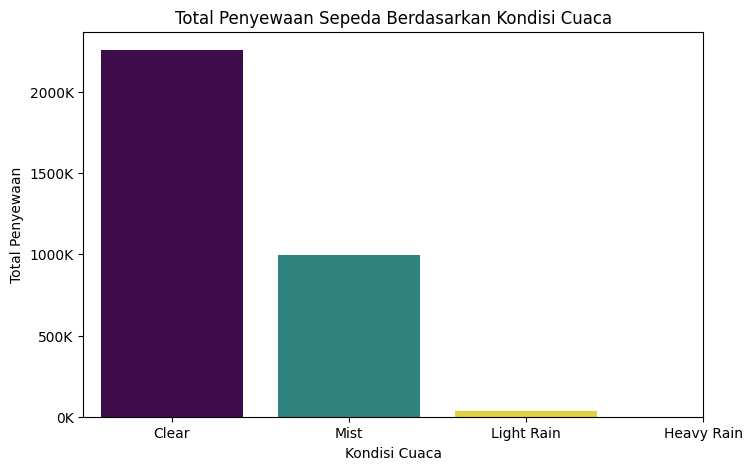

In [98]:
# Total penyewaan sepeda berdasarkan kondisi cuaca
weather_rentals = day_df.groupby('weathersit')['cnt'].sum().reset_index()

# Visualisasi total penyewaan sepeda berdasarkan cuaca
plt.figure(figsize=(8, 5))
sns.barplot(data=weather_rentals, x='weathersit', y='cnt', hue='weathersit', palette='viridis', dodge=False)
plt.title('Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Total Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=["Clear", "Mist", "Light Rain", "Heavy Rain"])

# Format sumbu y dalam ratusan atau ribuan
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x/1000)}K'))

# Menyembunyikan legenda
plt.legend([], [], frameon=False)

plt.show()

Cuaca bisa sangat mempengaruhi keputusan orang untuk menyewa sepeda. Visualisasi ini menunjukkan bagaimana kondisi cuaca mempengaruhi penyewaan sepeda. Jika ada cuaca buruk, seperti hujan, penyewaan cenderung menurun.

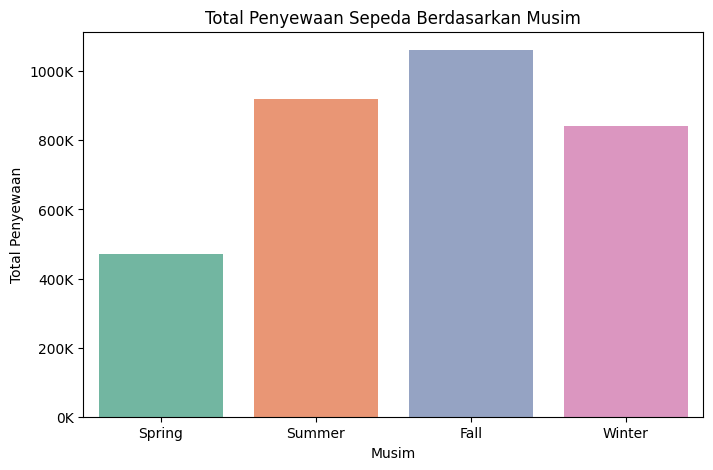

In [96]:
seasonal_rentals = day_df.groupby('season')['cnt'].sum().reset_index()

# Visualisasi total penyewaan sepeda berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(data=seasonal_rentals, x='season', y='cnt', hue='season', palette='Set2', dodge=False)
plt.title('Total Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Total Penyewaan')
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: f'{int(x/1000)}K'))

plt.legend([], [], frameon=False)

plt.show()

Di sini, kita melihat penyewaan sepeda berdasarkan musim. Hal ini memberikan informasi tentang musim mana yang paling banyak terjadi penyewaan sepeda, yaitu musim `Summer` dan `Fall`.

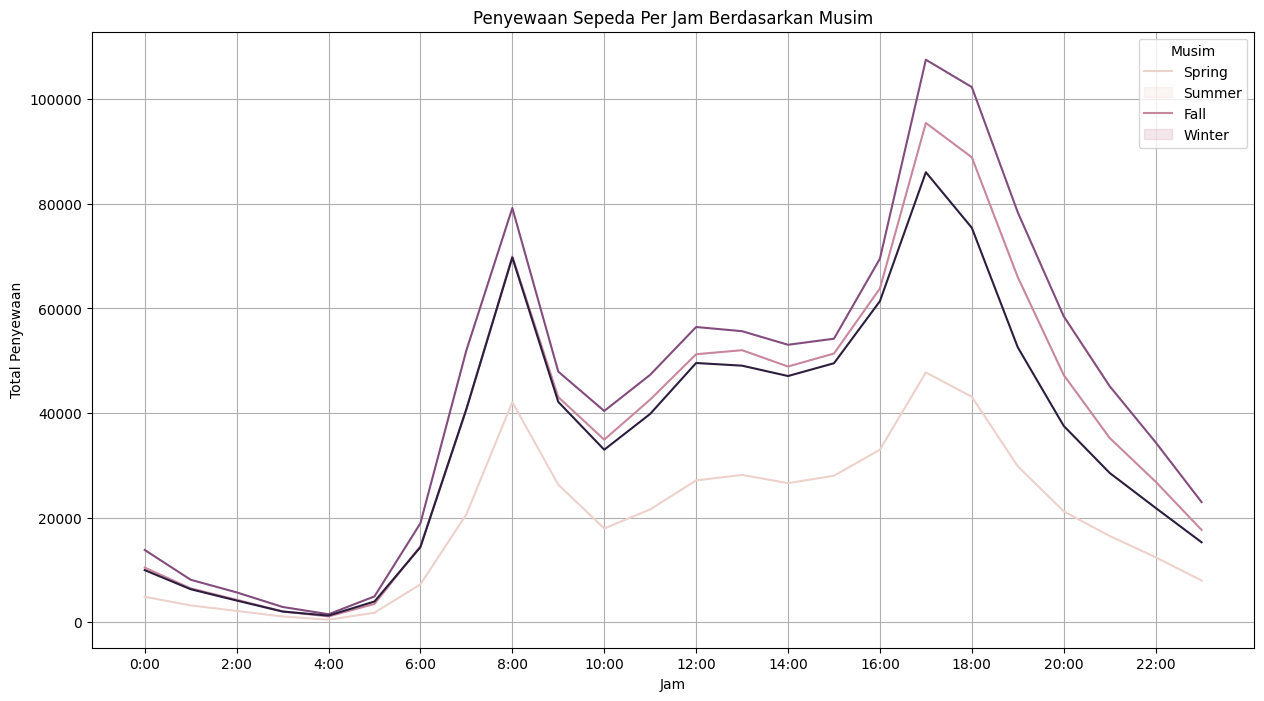

In [89]:
# Penyewaan sepeda per jam dalam setiap musim
hourly_seasonal_rentals = hour_df.groupby(['season', 'hr'])['cnt'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data=hourly_seasonal_rentals, x='hr', y='cnt', hue='season')
plt.title('Penyewaan Sepeda Per Jam Berdasarkan Musim')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(ticks=range(0, 24, 2), labels=[f'{i}:00' for i in range(0, 24, 2)])
plt.legend(title='Musim', labels=["Spring", "Summer", "Fall", "Winter"])
plt.grid(True)
plt.show()

Analisis ini menunjukkan pola penyewaan sepeda berdasarkan musim dan waktu dalam sehari. Ini membantu kita mengidentifikasi jam-jam sibuk yang berbeda di musim-musim tertentu, memberikan wawasan mengenai kapan pelanggan lebih cenderung menyewa sepeda. Penyewaan sepeda cenderung tinggi pada jam-jam sibuk (pagi dan sore) dan pada cuaca cerah. Musim juga memainkan peran, di mana musim `Fall` dan `Summer` menunjukkan tingkat penyewaan yang lebih tinggi.

### Pertanyaan 2. Kapan waktu terbaik untuk meningkatkan ketersediaan sepeda?

Untuk mengetahui waktu terbaik untuk meningkatkan ketersediaan sepeda, kita perlu melihat pola penyewaan pada jam-jam tertentu dalam sehari.

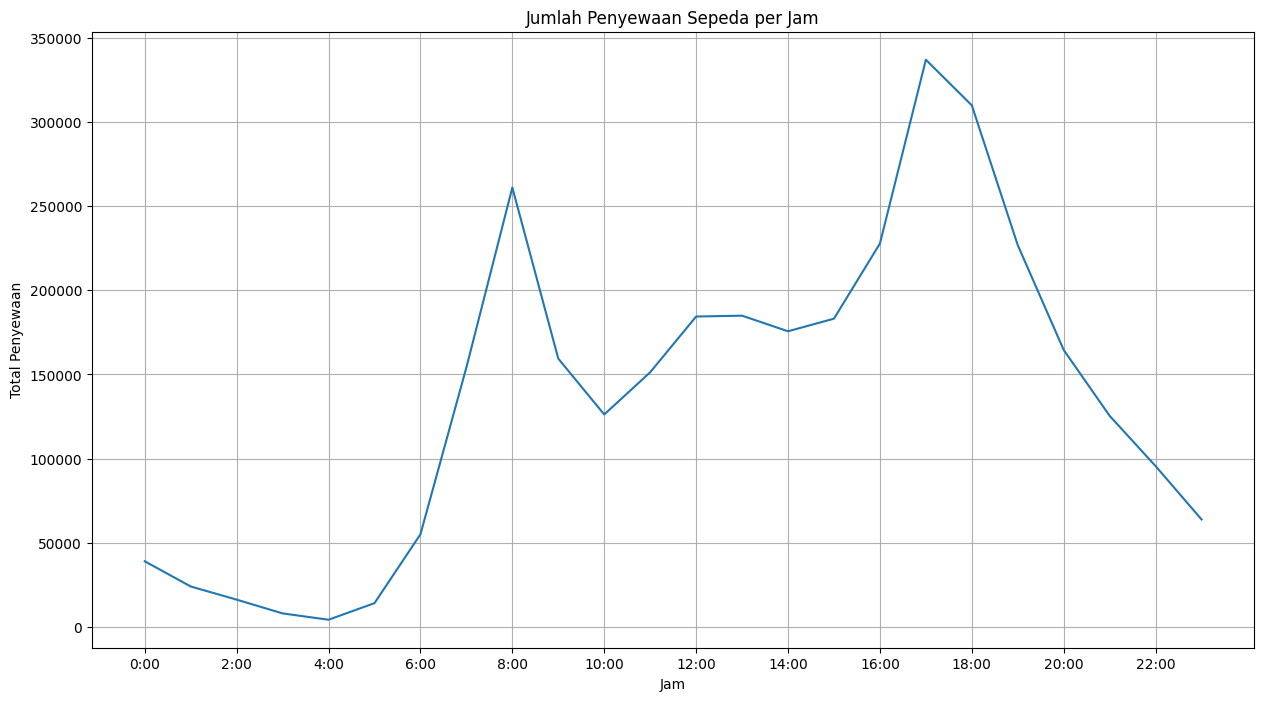

In [99]:
# Total penyewaan sepeda berdasarkan jam dalam sehari
hourly_rentals = hour_df.groupby('hr')['cnt'].sum().reset_index()

plt.figure(figsize=(15, 8))
sns.lineplot(data=hourly_rentals, x='hr', y='cnt')
plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.xticks(ticks=range(0, 24, 2), labels=[f'{i}:00' for i in range(0, 24, 2)])
plt.grid(True)
plt.show()

Grafik ini menunjukkan jam-jam puncak penyewaan sepeda yang biasanya terjadi pada pagi dan sore hari. Untuk meningkatkan ketersediaan sepeda, fokuslah pada jam-jam ini.

## Conclusion

Pertanyaan 1: Apa faktor utama yang memengaruhi pola penyewaan sepeda berdasarkan waktu dan kondisi lingkungan?

Berdasarkan analisis EDA, faktor utama yang memengaruhi pola penyewaan sepeda adalah waktu dalam sehari (jam) dan kondisi cuaca. Penyewaan sepeda cenderung tinggi pada jam-jam sibuk (pagi dan sore) dan pada cuaca cerah. Musim juga memainkan peran, di mana musim Fall dan Summer menunjukkan tingkat penyewaan yang lebih tinggi.

Pertanyaan 2: Kapan waktu terbaik untuk meningkatkan ketersediaan sepeda?

Waktu terbaik untuk meningkatkan ketersediaan sepeda adalah pada jam-jam sibuk (pagi dan sore), terutama pada musim Summer dan Fall, yang menunjukkan permintaan yang lebih tinggi. Penyewaan sepeda lebih tinggi di musim-musim tersebut, dan saat cuaca cerah, sehingga meningkatkan ketersediaan sepeda pada jam-jam ini dapat membantu mengoptimalkan operasional.